In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

col_name = ['func', 'start', 'end', 'filename', 'worker', 'thread', 'process']

def worker_gantt_chart(filename, *, framework):
    
    df = pd.read_csv(filename, header=None, names=col_name)
    
    if framework == 'dask':
        pass
    elif framework == 'spark':
        df['thread'] = df['process']
    else:
        return f'{framework} is not supported.'

    df['runtime'] = df.end - df.start

    # Simplify the workers name
    df['worker_name'] = df.worker.map(str).map(lambda x: ''.join(x.split('-')[1:]).split('.')[0])

    # Simplify the thread number for each worker
    thread_worker = {w+'::'+str(t): i+1 
                     for w in df.worker_name.unique()
                         for i, t in enumerate(df[df.worker_name == w].thread.unique())
                     }
    df['worker_thread'] = df.worker_name.map(str) + '::' + df.thread.map(str)
    df['thread_number'] = df.worker_thread.map(lambda x: thread_worker[x])
    df['worker_thread'] = df.worker_name.map(str) + '::thread' + df.thread_number.map(str)
    df = df.sort_values(by=['worker_name','thread_number'], ascending=[False, True])

    color = {"read_img":"turquoise", "find_frequency":"crimson", 'save_histogram':'orange'}
    fig,ax=plt.subplots(figsize=(15,10))

    labels=[]
    for i, thread in enumerate(df.groupby('worker_thread', sort=False)):
        labels.append(thread[0])
        for r in thread[1].groupby("func"):
            data = r[1][["start", "runtime"]]
            ax.broken_barh(data.values, (i-0.4,0.8), color=color[r[0]],
                           edgecolor='black',
                           alpha=0.6,

                          )

    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels) 
    ax.set_xlabel("time [s]")

    # Set legend
    red_patch = mpatches.Patch(color='turquoise', label='read_img')
    blue_patch = mpatches.Patch(color='crimson', label='find_frequency')
    orange_patch = mpatches.Patch(color='orange', label='save_histogram')
    plt.legend(loc='upper center', bbox_to_anchor=(1.085, 1.008), handles=[red_patch, blue_patch, orange_patch])

    plt.tight_layout()
    plt.show()


In [7]:
def func_gantt_chart(filename, *, framework, alpha=0.02):
    
    df = pd.read_csv(filename, header=None, names=col_name)
    
    if framework == 'dask':
        pass
    elif framework == 'spark':
        df['thread'] = df['process']
    else:
        return f'{framework} is not supported.'

    df['runtime'] = df.end - df.start
    
    color = {"read_img":"turquoise", "find_frequency":"crimson", 'save_histogram':'orange'}
    fig,ax=plt.subplots(figsize=(10,5))

    labels=[]
    for i, thread in enumerate(df.groupby("func", sort=False)):
        labels.append(thread[0])
        for r in thread[1].groupby("func"):
            data = r[1][["start", "runtime"]]
            ax.broken_barh(data.values, (i-0.4,0.8), color=color[r[0]], alpha=alpha)

    ax.set_yticks(range(len(labels)))
    ax.set_yticklabels(labels) 
    ax.set_xlabel("time [s]")

    # Set legend
    red_patch = mpatches.Patch(color='turquoise', label='read_img')
    blue_patch = mpatches.Patch(color='crimson', label='find_frequency')
    orange_patch = mpatches.Patch(color='orange', label='save_histogram')
    plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1.015), handles=[red_patch, blue_patch, orange_patch])

    plt.tight_layout()
    plt.show()

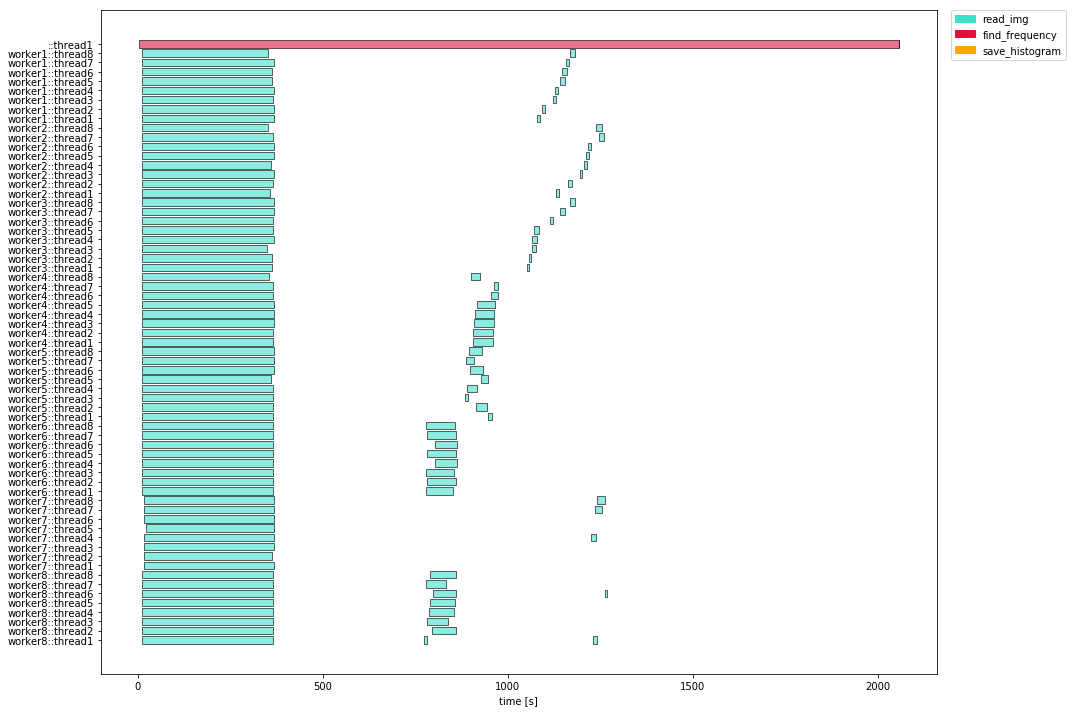

In [8]:
filename = '../histogram/data-1/results-spark_histogram-baseline.csv'
worker_gantt_chart(filename, framework='spark')

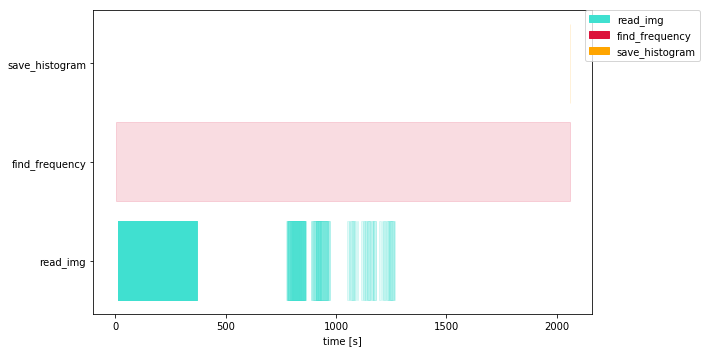

In [13]:
func_gantt_chart(filename, framework='spark', alpha=0.15)